# Women's Clothing Reviews

## E-commerce clothing review analysis FINAL

# Table of Contents
* 1. [Introduction](#first-bullet)
    * 1.1 [Problem](#second-bullet)
    * 1.2 [Target Readers](#third-bullet)
    * 1.3 [Data Source](fifth-bullet)
* 2. [Import Modules](sixth-bullet)
* 3. [Data Wrangling](seventh-bullet)
    * 3.1 [Import Data](eigth-bullet)
    * 3.2 [Create Feature](ninth-bullet)
* 4. [Exploratory Data Analysis](tenth-bullet) 
    * 4.1 [Analyzing reviews and recommendation of clothing item](eleventh-bullet)
    * 4.2 [Comparison of age and sentiment of consumer](twelveth-bullet)
    * 4.3 [Reviews WordCloud](thirteenth-bullet)
    * 4.4 [Positive feedback count](fourteenth-bullet)
* 5. [Text Processing](fifteenth-bullet)
* 6. [Machine Learning](sixteenth-bullet)

# Introduction

## Problem:
The current reality of the apparel industry is that less and less consumers are frequenting brick and mortar establishments. Customers are finding themselves drawn more towards online shopping and e-commerce for its ease and convenience. A unique problem that is arising from e-commerce, particularly for the apparel industry, is how customers are deciding on specific products without physically seeing, touching, or trying on articles of clothing. As a result, reviews are the go to resource when making decisions on whether to buy something or not. Reviews are not only important for consumers, but also for any online retail. They rely on reviews to generate interest and profit on a particular item. 

Reviews can be extensive and oftentimes contain irrelevant information. Can we compress the data to improve the product? Can we take the reviews and predict other consumer feedback, specifically recommendation? From reviews, online retailers can improve the quality of their product to satisfy consumers and increase profit and credibility. 

## Target Readers:

### -Online Retailers (Amazon, Target, Walmart, Ebay, etc.)
Use this report to improve products and increase profit and credibility.

### -Online customers
Consider this report as a reference for quality reviews and key words for choosing a product or online retailer.


## Data Source:
Data was obtained from a Kaggle competition, in csv format, through the following link: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

Each row corresponds to a customer review and includes the following
variables:

- **Clothing ID** - Refers to specific piece being reivewed *INT*
- **Age**: Reviewer's age *INT*
- **Title**: Title of review *STRING*
- **Review Text**: Review body *STRING*
- **Rating**: product score granted by customer *INT*
- **Recommended IND**: Whether customer recommends product or not *INT*
- **Positive Feedback Count**: documents number of customers who found review positive *INT*
- **Division name**: Name of product high level division *STRING*
- **Department name**: Name of product department *STRING*
- **Class name**: Name of product class *STRING*

# Import Modules

In [1]:
#import basic packages
import numpy as np
import pandas as pd

In [2]:
#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
#import text packages
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from textblob import TextBlob, Word

# import word cloud module 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# import sklearn modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [5]:
# import stats modules
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency

# Data Wrangling

## Import data

In [6]:
#read file
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [7]:
#explore data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Here we see that there are 23486 entries where unnamed: 0, Clothing ID, and Age match up. The rest of the variables contain null values. Since our focus is on the review text, we will delete missing observations that pertains to it.

In [9]:
# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 22628 non-null int64
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Title                      19662 non-null object
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommended IND            22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


Now the only column with unmatching non-null values is Title. We will leave this as is since it does not affect our analysis.

## Create Feature

The goal here is to create a new feature that divides the rating into two categories: positive and negative reviews. We can potentially use this as ground truth to analyze our classifier model with later on.

In [10]:
#set new variable
#create negative and positive reviews based on rating
df["Label"] = 'negative' #negative reviews
df.loc[df.Rating >= 4, ['Label']] = 'positive' #positive reviews
df.loc[df.Rating == 3, ['Label']] = 'neutral' #neutral reviews

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive


# Exploratory Data Analysis

## Analyzing reviews and recommendations of clothing items

The goal here is to look at the rest of our data without touching review text. We will answer some of the questions we had hoped to analyze.

### What clothing item gets reviewed the most?

Companies find this question important because it shows which item(s) consumers care about the most.

In [11]:
#determine count of specific clothing item
df['Class Name'].value_counts()

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Chemises             1
Casual bottoms       1
Name: Class Name, dtype: int64

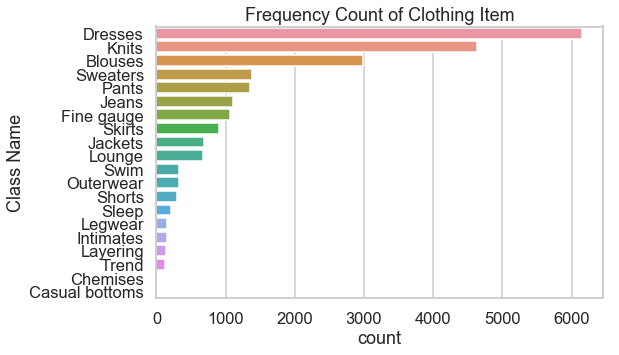

In [12]:
#create plot
plt.subplots(figsize=(8,5))
sns.countplot(y='Class Name', data=df, order=df['Class Name'].value_counts().index)
plt.title('Frequency Count of Clothing Item')
plt.savefig('mostreviewed.png', bbox_inches='tight', dpi = 150)

Here we see that dresses, knits, and blouses get reviewed the most. Most of these online consumers care about dresses, knits, and blouses. This can help retailers determine whether to focus more on this inventory or not depending on what the ratings were. 

### What items get recommended the most?

Retailers care about this question because it can help them determine which items in keep in stock and what not to. It can also be helpful if there were characteristics of these clothing items that can help retailers know what's trending and what's not.

In [13]:
#create dataframe for recommended items only
df_rec = df[df['Recommended IND']==1]

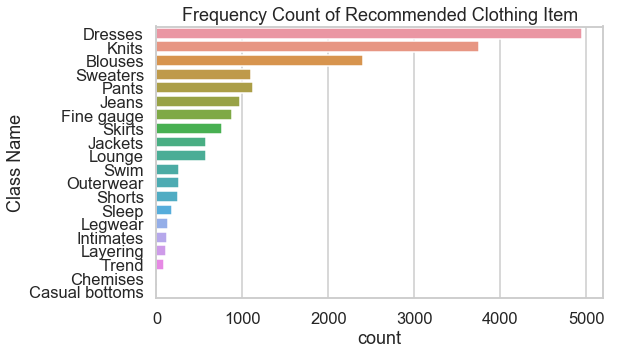

In [14]:
#create plot 
plt.subplots(figsize=(8,5))
sns.countplot(y='Class Name', data=df_rec, order=df['Class Name'].value_counts().index)
plt.title('Frequency Count of Recommended Clothing Item')
plt.savefig('mostrecommended.png', bbox_inches='tight', dpi = 150)

The most reviewed items are also the most recommended items. Dresses, knits, and blouses are the top three most reviewed and recommended items. Next, let's check out if other consumers thought these reviews were good.

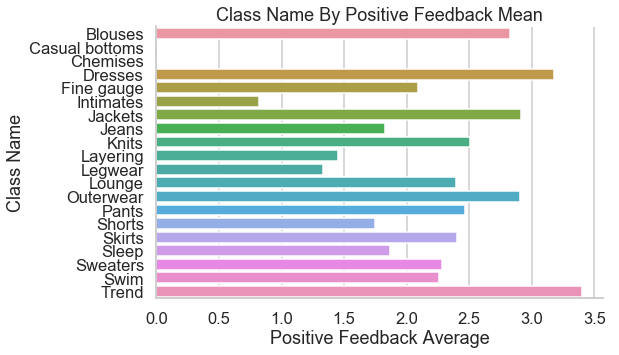

In [15]:
#check clothing item by positive feedback average
data = df.groupby('Class Name')['Positive Feedback Count'].mean().reset_index()
data.head()

fig=plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)
sns.barplot(x='Positive Feedback Count', y='Class Name', data=data)
plt.title('Class Name By Positive Feedback Mean')
plt.xlabel('Positive Feedback Average')
sns.despine()
plt.savefig('positivefeedback.png', bbox_inches='tight', dpi = 150)

#### Class Name Summary: 
Blouses, dresses and knits are the top three most reviewed and recommended clothing items. They are also the clothing items with the most positive feedback from reviews. This makes sense because more people are spending time writing reviews and recommending these items. This also shows that most consumers are interested in blouses, dresses and knits. Retailers can build on this and determine what makes these clothing items so popular among women. On average though, trend receives the most positive feedback.

### What is the age distribution of these consumers?

It's always to good to know your target audience. This question shows the type of consumers a retail has and/or ways they can change to target a different age range.

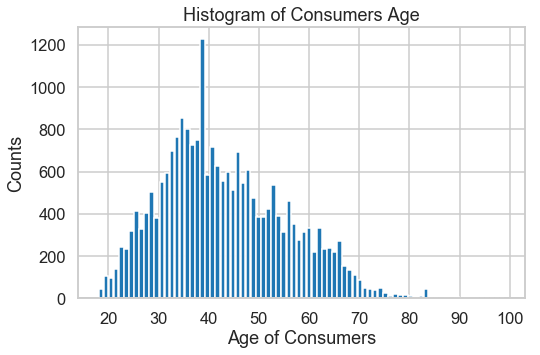

In [16]:
#plot histogram of age
df.Age.hist(bins=80, figsize=(8,5), rwidth=0.9)
plt.xlabel('Age of Consumers')
plt.ylabel('Counts')
plt.title('Histogram of Consumers Age')
plt.rcParams['axes.axisbelow']=True
plt.savefig('agereview.png', bbox_inches='tight', dpi = 150)

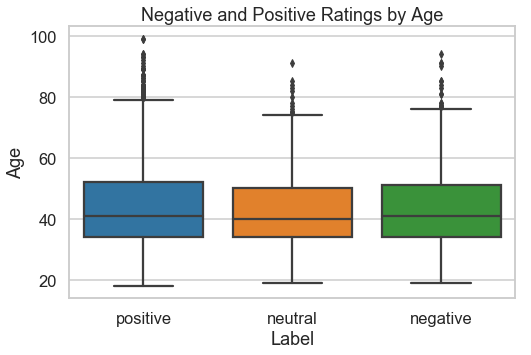

In [17]:
#look at negative or positive reviews by age.
plt.figure(figsize=(8,5))
sns.boxplot(x = 'Label', y = 'Age', data = df)
plt.title('Negative and Positive Ratings by Age')
plt.savefig('agereviewlabel.png', bbox_inches='tight', dpi = 150)

Text(0.5,1,'Class Name Reviews by Age')

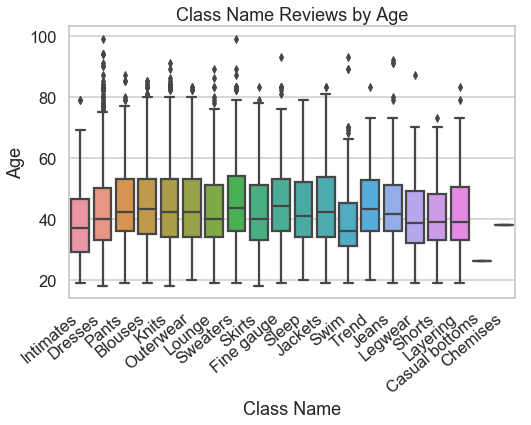

In [18]:
#check age distribution by class name
plt.figure(figsize=(8,5))
plt.xticks(rotation=40, ha="right")
sns.boxplot(x = 'Class Name', y = 'Age', data = df)
plt.title('Class Name Reviews by Age')

#### Age Summary:
The age range of consumers is between 20 and 85 years old. That's quite the range! We see that majority of consumers are between 35-40 years old. The negative and positive review ratings are pretty close in median age based on the boxplot above. A check of age distribution based on class name tells us that the top three items are reviewed by a median age of 40. From this EDA we know that our main target audience are 40 year old females.

## Focus on Review Text

### Are there any patterns in the consumer review narratives?

Here we switch gears to NLP to focus on the meat of the data. With this unstructured data we will create new features such as review length, average words, and sentiment.

In [19]:
#view review length
df['Review Length'] = df['Review Text'].apply(len)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive,192


C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


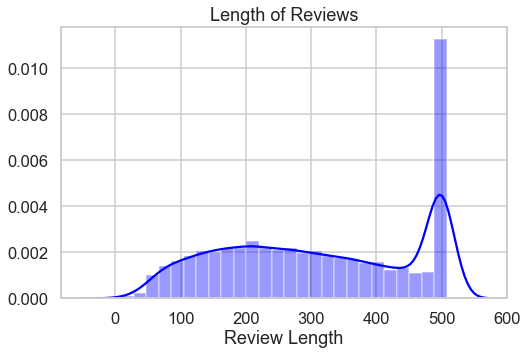

In [20]:
fig = plt.figure(figsize=(8, 5))
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")
plt.savefig('reviewlength.png', bbox_inches='tight', dpi = 150)

This is interesting. There is a spike at 500; which probably indicates that the max lenth of characters is 500.

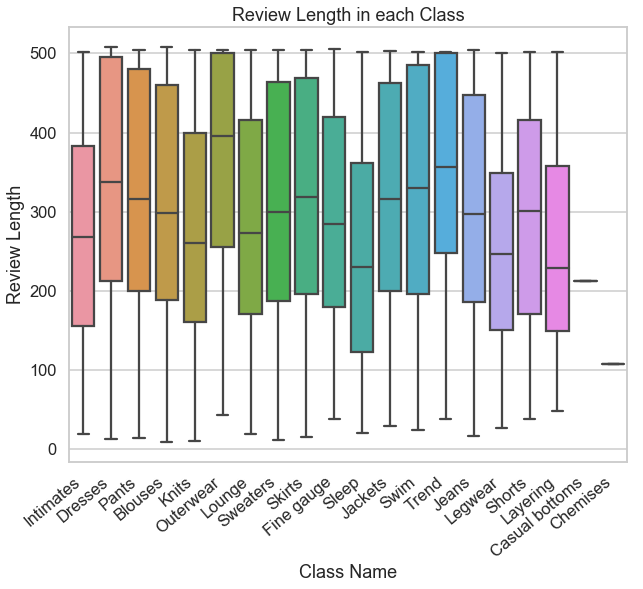

In [21]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=40, ha="right")
sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
plt.title("Review Length in each Class")
plt.savefig('classreviewlength.png', bbox_inches='tight', dpi = 150)

Above shows the breakdown of review lengths for each clothing item in this review data set. Of the top three most reviewed and recommended item, dresses had the highest median review length then blouses and knits. Outerwear has the highest median review length. Probably due to price, commitment and details.

#### Review Narratives Summary:
Overall we see there is a limit to the character count of each review, 500. The top three choices have character range of 250-350, with outerwear having the most characters. 

The word cloud gives an impression of what is mentioned most in the reviews. We see that most of the words focus on type of clothing and fit of clothing. This also shows what the consumers care about most as well. 

## Review Text pre-processing

In [22]:
#sample view of review text
print(df['Review Text'].iloc[20270])

The color pattern in this material pops a lot more in person than on the website. fits perfectly, very versatile regardless of the occasion or the season (at least in california!). love it.


In [23]:
#check average words used in each review text
#function to find average words in each reivew text
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['Avg_word'] = df['Review Text'].apply(lambda x: avg_word(x))
df[['Review Text','Avg_word']].head()

,Review Text,Avg_word
0,Absolutely wonderful - silky and sexy and comf...,5.750000
1,Love this dress! it's sooo pretty. i happene...,3.822581
2,I had such high hopes for this dress and reall...,4.112245
3,"I love, love, love this jumpsuit. it's fun, fl...",4.681818
4,This shirt is very flattering to all due to th...,4.361111


Text(0.5,1,'Average word in each Class')

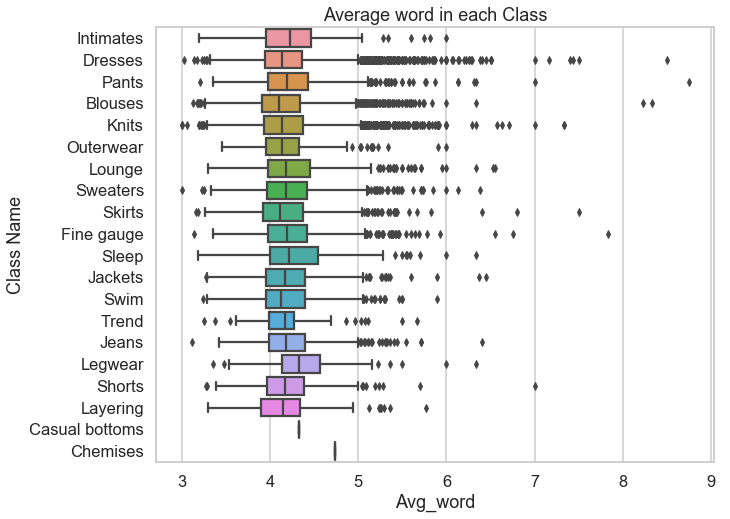

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(y = 'Class Name', x = 'Avg_word', data = df)
plt.title("Average word in each Class")

It appears the median average word for each clothing item are pretty close together whereas the review length had more varying differences.  

### Extracting root word

How often a word is used is key information in natural language processing. It is necessary to reduce words to their root form in order to determine the weight it has.

Lemmatization is a process that reduces tokens to their base word. It is an organized and step by step procedure of obtaining the root form of the word. This technique takes into account context similarity according to part-of-speech anatomy.

Stemming is another approach that can be used, but it only performs truncation and won't be able to reduce by tenses, i.e. "bought" to "buy".

We will be using the WordNetLemmatizer from the Natural Language Toolkit (or NLTK). Lemmatization only applies to each word but it is dependent on sentence structure to understand context. We therefore need to have part-of-speech tags associated with each word. Our output is derived from applying the lemmatize function to our preprocessed column.

The lemmatize function works as follows:

- Each review is broken down into a list of sentences
- Punctuation is removed using regex
- Every sentence is further broken down into words (tokens)

Each of the sentences then becomes an ordered bag of words. Every word in that bag is then tagged with a part-of-speech. This word-tag tuple pair is then fed one at a time to the lemmatize_word function, which works as follows:

- Only modifiable words – nouns, verbs, adjectives, and adverbs – can be reduced to roots
- These words are lemmatized and appended to the root list
- Words that are not modifiable are added as they are to the root list

The output lists are linked together as a string using whitespace. In the end, each preprocessed review will retain its text form but with each word simplified as much as possible.

In [25]:
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ['wordnet', 'stopwords', 'punkt', 'averaged_perceptron_tagger', 'maxent_treebank_pos_tagger']

for resource in resources:
  try:
    nltk.data.find('tokenizers/' + resource)
  except LookupError:
    nltk.download(resource)

#create Lemmatizer object
lem = WordNetLemmatizer()

def lemmatize_word(tagged_token):
  root = []
  for token in tagged_token:
    tag = token[1][0]
    word = token[0]
    if tag.startswith('J'):
      root.append(lem.lemmatize(word, wordnet.ADJ))
    elif tag.startswith('V'):
      root.append(lem.lemmatize(word, wordnet.VERB))
    elif tag.startswith('N'):
      root.append(lem.lemmatize(word, wordnet.NOUN))
    elif tag.startswith('R'):
      root.append(lem.lemmatize(word, wordnet.ADV))
    else:
      root.append(word)
  return root


def lemmatize(docs):
  lemmatized_list = []
  tokenized_sent = sent_tokenize(docs)
  for sent in tokenized_sent:
    no_punctuation = re.sub(r"[^a-zA-Z0-9]"," ", sent)
    tokenized_word = word_tokenize(no_punctuation)
    tagged = pos_tag(tokenized_word)
    lemmatized = lemmatize_word(tagged)
    lemmatized_list.extend(lemmatized)
  return " ".join(lemmatized_list)

df['preprocessed'] = df['Review Text'].apply(lambda row: lemmatize(row))

print(df['preprocessed'].iloc[20270])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vangk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vangk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vangk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\vangk\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
The color pattern in this material pop a lot more in person than on the website fit perfectly very versatile regardless of the occasion or the season at least in california love it


### Normalize Text

In [26]:
#lowercase all words in review text
df['preprocessed'] = df['preprocessed'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove stopwords
stop = stopwords.words('english')
df['preprocessed'] = df['preprocessed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#find common words
freq = pd.Series(' '.join(df['preprocessed']).split()).value_counts()[:10]

#remove these common words as they do not add value to the analysis
freq = list(freq.index)
df['preprocessed'] = df['preprocessed'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

#check for rare words
freq = pd.Series(' '.join(df['preprocessed']).split()).value_counts()[-10:]

#remove rare words as they get dominated by noise
freq = list(freq.index)
df['preprocessed'] = df['preprocessed'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

df['preprocessed'].head()
print(df['preprocessed'].iloc[20270])

pattern material pop lot person website perfectly versatile regardless occasion season least california


In [27]:
#remove any extra spaces present
pattern = r"[\s]+"
df['preprocessed'] = df['preprocessed'].str.replace(pat=pattern, repl=" ", regex=True)

print(df['preprocessed'].iloc[20270])

pattern material pop lot person website perfectly versatile regardless occasion season least california


## Tokenization

The preprocessed entries are broken down into individual words or token and extracted to make up our corpora.

In [28]:
corpora = df['preprocessed'].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[20270])

['pattern', 'material', 'pop', 'lot', 'person', 'website', 'perfectly', 'versatile', 'regardless', 'occasion', 'season', 'least', 'california']


# Machine Learning

## Determine sentiment using Textblob

TextBlob is an open-source library used for performing NLP sentiment analysis. It leverages both polarity and subjectivity scores.

In [29]:
from textblob import TextBlob

# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['preprocessed']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                else 'neutral'
                                     for score in sentiment_scores_tb]

df['sent_tb_scores'] = sentiment_scores_tb
df['sent_tb_cat'] = sentiment_category_tb

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Review Length,Avg_word,preprocessed,sent_tb_scores,sent_tb_cat
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive,53,5.750000,absolutely wonderful silky sexy comfortable,0.633,positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive,303,3.822581,sooo pretty happen find store glad bc never wo...,0.228,positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral,500,4.112245,high hope really want work initially order pet...,0.046,positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive,124,4.681818,jumpsuit fun flirty fabulous every time get no...,0.350,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive,192,4.361111,shirt flattering due adjustable front tie perf...,0.438,positive


In [30]:
# sentiment statistics per class name
df_tb = df[['Class Name','sent_tb_scores','sent_tb_cat']]
df_tb.groupby(['Class Name']).describe()

sent_tb_scores                                              \
                        count      mean       std    min      25%     50%   
Class Name                                                                  
Blouses                2983.0  0.171409  0.193744 -0.500  0.05000  0.1580   
Casual bottoms            1.0  0.412000       NaN  0.412  0.41200  0.4120   
Chemises                  1.0  0.188000       NaN  0.188  0.18800  0.1880   
Dresses                6145.0  0.192803  0.198954 -1.000  0.06400  0.1800   
Fine gauge             1059.0  0.169540  0.187531 -1.000  0.04900  0.1670   
Intimates               147.0  0.201442  0.186673 -0.377  0.08950  0.1710   
Jackets                 683.0  0.168600  0.215746 -0.562  0.04300  0.1480   
Jeans                  1104.0  0.174560  0.195374 -0.800  0.05000  0.1605   
Knits                  4626.0  0.165491  0.196744 -0.800  0.04400  0.1540   
Layering                132.0  0.161697  0.205366 -0.333  0.01650  0.1385   
Legwear                 158.0  0.202120  0.210479 -0.250  0.04675  0.1765   
Lounge                  669.0  0.171220  0.205457 -0.575  0.04400  0.1560   
Outerwear               319.0  0.177944  0.178600 -0.385  0.05750  0.1570   
Pants                  1350.0  0.177978  0.200813 -0.500  0.05200  0.1700   
Shorts                  304.0  0.160118  0.163317 -0.278  0.05300  0.1455   
Skirts                  903.0  0.198763  0.198417 -0.500  0.07700  0.1820   
Sleep                   214.0  0.201444  0.199515 -0.500  0.06125  0.1940   
Sweaters               1380.0  0.183944  0.188284 -0.700  0.06850  0.1740   
Swim                    332.0  0.189690  0.207651 -0.500  0.03775  0.1690   
Trend                   118.0  0.142703  0.210754 -0.317  0.02425  0.1375   

                                
                    75%    max  
Class Name                      
Blouses         0.27800  1.000  
Casual bottoms  0.41200  0.412  
Chemises        0.18800  0.188  
Dresses         0.30000  1.000  
Fine gauge      0.27700  0.850  
Intimates       0.29000  0.850  
Jackets         0.27700  1.000  
Jeans           0.28000  1.000  
Knits           0.27000  1.000  
Layering        0.31175  1.000  
Legwear         0.30875  1.000  
Lounge          0.29400  1.000  
Outerwear       0.28550  1.000  
Pants           0.28775  1.000  
Shorts          0.24375  0.925  
Skirts          0.30550  1.000  
Sleep           0.31875  0.850  
Sweaters        0.27800  1.000  
Swim            0.29625  1.000  
Trend           0.27100  1.000

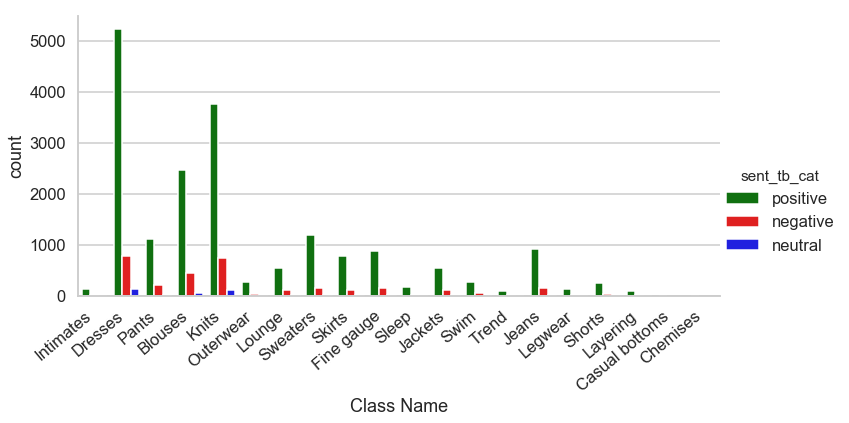

In [31]:
fc = sns.catplot(x="Class Name", hue='sent_tb_cat', 
                    data=df_tb, kind="count", 
                    palette={"negative": 'red', 
                             "positive": 'green', 
                             "neutral": 'blue'}, height=5, aspect=2)
fig, ax = plt.xticks(rotation=40, ha="right")
plt.savefig('classbysent.png', bbox_inches='tight', dpi = 150)

In [32]:
pos_idx = df[(df['Class Name']=='Dresses') & (df.sent_tb_scores == 1.0)].index[0]
neg_idx = df[(df['Class Name']=='Dresses') & (df.sent_tb_scores == -1.0)].index[0]

print('Most Negative Dress Review:', df.iloc[neg_idx][['Review Text']][0])
print()
print('Most Positive Dress Review:', df.iloc[pos_idx][['Review Text']][0])

Most Negative Dress Review: I love this jacket! i was hesitant to order, but i'm so glad i did. it's such a cute, unique blazer to add to my wardrobe. fit is very true to size for a blazer.

Most Positive Dress Review: Like the extra details on the neck and back - and it's versatile to wear everywhere


Looks like the most negative article is a result of the word 'hesitant'. Whereas the most positive review had no 'negative' terminology present.

[[15323  1759   353]
 [ 1476   829    65]
 [ 2085   675    63]]


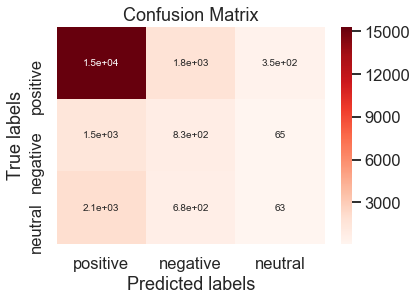

In [33]:
#set variables for analysis of model
#using labeled column of rating as ground truth to compare model to
y_true = df['Label']
y_pred = df['sent_tb_cat']

labels = ['positive', 'negative', 'neutral']

cm = confusion_matrix(y_true, y_pred,  labels=labels)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['positive', 'negative', 'neutral']); ax.yaxis.set_ticklabels(['positive', 'negative', 'neutral'])
plt.savefig('confusion.png', bbox_inches='tight', dpi = 150)

## Determine sentiment using Afinn

One of the simplest and most popular lexicons used for sentiment analysis. Contains 3,300+ words with a polarity score associated with each word. With this, we use our corpora dictionary to determine sentiment.

In [34]:
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels in corpora (determined above)
sentiment_scores = [af.score(article) for article in corpora]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

df['sent_af_scores'] = sentiment_scores
df['sent_af_cat'] = sentiment_category

df_tb = df[['Class Name','sent_af_scores','sent_af_cat']]
df_tb.groupby(['Class Name']).describe()

sent_af_scores                                                
                        count      mean       std   min  25%  50%   75%   max
Class Name                                                                   
Blouses                2983.0  4.402280  4.438539  -9.0  1.0  4.0  7.00  27.0
Casual bottoms            1.0  5.000000       NaN   5.0  5.0  5.0  5.00   5.0
Chemises                  1.0  2.000000       NaN   2.0  2.0  2.0  2.00   2.0
Dresses                6145.0  4.783889  4.597734 -12.0  2.0  4.0  8.00  35.0
Fine gauge             1059.0  4.345609  4.534004 -14.0  1.0  4.0  7.00  30.0
Intimates               147.0  5.904762  4.841789  -7.0  2.5  5.0  9.00  20.0
Jackets                 683.0  4.465593  4.332233  -8.0  2.0  4.0  7.00  20.0
Jeans                  1104.0  4.754529  4.565875 -12.0  2.0  4.0  8.00  24.0
Knits                  4626.0  4.156507  4.193655 -12.0  1.0  4.0  7.00  25.0
Layering                132.0  4.265152  3.994003  -2.0  1.0  4.0  6.25  17.0
Legwear                 158.0  4.575949  3.515741  -4.0  2.0  4.5  7.00  15.0
Lounge                  669.0  4.596413  4.358389  -9.0  2.0  4.0  7.00  20.0
Outerwear               319.0  5.354232  4.704130 -10.0  2.0  5.0  9.00  22.0
Pants                  1350.0  4.828148  4.510438 -11.0  2.0  5.0  8.00  23.0
Shorts                  304.0  4.536184  4.186101  -7.0  2.0  4.0  7.00  18.0
Skirts                  903.0  5.214839  4.493691 -11.0  2.0  5.0  8.00  27.0
Sleep                   214.0  4.626168  4.273564  -4.0  2.0  4.0  7.00  21.0
Sweaters               1380.0  4.424638  4.371704  -9.0  1.0  4.0  7.00  23.0
Swim                    332.0  5.102410  4.933552  -5.0  2.0  5.0  8.00  25.0
Trend                   118.0  4.389831  5.242877  -7.0  1.0  4.0  7.00  20.0

In [35]:
pos_idx = df[(df['Class Name']=='Dresses') & (df.sent_af_scores == 35.0)].index[0]
neg_idx = df[(df['Class Name']=='Dresses') & (df.sent_af_scores == -12.0)].index[0]

print('Most Negative Dress Review:', df.iloc[neg_idx][['Review Text']][0])
print()
print('Most Positive Dress Review:', df.iloc[pos_idx][['Review Text']][0])

Most Negative Dress Review: Loved the dress on-line. ordered a petite small. fits perfectly. i am barely 5'5" and carry my weight in hips and thighs. this fits perfectly without being too snug on the butt!! so, if you are a pear shape, get this dress!!

Most Positive Dress Review: Great skirt! i bought the red and paired it with a casual white button down. i feel like the top definitely needs to be short or tucked in for the look to work. i am typically a 2 in bottoms, and went with the small in this. the xs probably fits more like it's intended to, but it is very curve-hugging, and i was more comfortable with the looser fit of the small (especially since i am tucking in a blouse). there is stretch in the skirt, and the fabric has a nice feel.


[[15176   977  1282]
 [ 1425   650   295]
 [ 2013   472   338]]


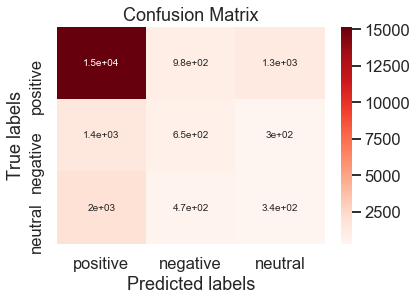

In [36]:
y_pred_af = df['sent_af_cat']
cm_af = confusion_matrix(y_true, y_pred_af,  labels=labels)
print(cm_af)

ax= plt.subplot()
sns.heatmap(cm_af, annot=True, ax = ax, cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['positive', 'negative', 'neutral']); ax.yaxis.set_ticklabels(['positive', 'negative', 'neutral'])
plt.savefig('afinnconfusion.png', bbox_inches='tight', dpi = 150)

In [37]:
#calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average = 'weighted')
recall = recall_score(y_true, y_pred, average = 'weighted')
f_measure = f1_score(y_true, y_pred, average = 'weighted')

print(f"Accuracy score for textblob is: {accuracy*100}")
print(f"Precision score for textblob is: {precision*100}")
print(f"Recall score for textblob is: {recall*100}")
print(f"f measure for textblob is: {f_measure*100}")

Accuracy score for textblob is: 71.65900654056921
Precision score for textblob is: 66.81595177916854
Recall score for textblob is: 71.65900654056921
f measure for textblob is: 68.57389817944194


In [38]:
#calculate metrics
accuracy_af = accuracy_score(y_true, y_pred_af)
precision_af = precision_score(y_true, y_pred_af, average = 'weighted')
recall_af = recall_score(y_true, y_pred_af, average = 'weighted')
f_measure_af = f1_score(y_true, y_pred_af, average = 'weighted')

print(f"Accuracy score for afinn is: {accuracy_af*100}")
print(f"Precision score for afinn is: {precision_af*100}")
print(f"Recall score for afinn is: {recall_af*100}")
print(f"f measure for afinn is: {f_measure_af*100}")

Accuracy score for afinn is: 71.43362206116316
Precision score for afinn is: 68.26473852188103
Recall score for afinn is: 71.43362206116316
f measure for afinn is: 69.70060349580658


Based on the above metrics, we see that Afinn is better at analyzing sentiment than Textblob

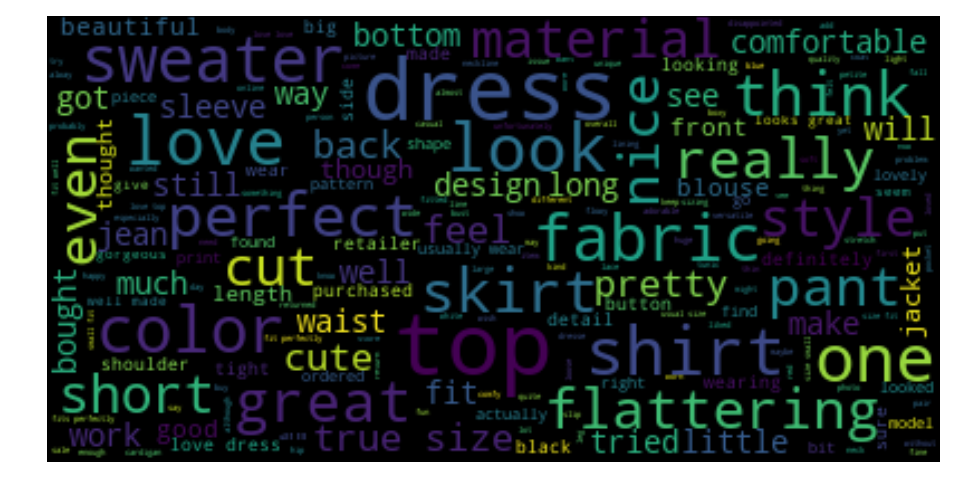

In [39]:
# Word cloud from reviews
all_tags = []
for iter_row, row in df.iterrows():
    my_tags = row['Review Text'].split(',')
    for tag in my_tags:
        all_tags.append(tag)


#Read the whole text.
text = ' '.join(all_tags)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png', bbox_inches='tight', dpi = 150)

## Machine Learning: Predict Recommendation of item

Can we use machine learning models to predict the recommendation of a clothing item based on the data set? If the top recommended items can be found, companies can increase revenue by focusing on features that their consumers are most interested in. This also helps in promoting customer service and satisfation.

### Feature Selection

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 19 columns):
Unnamed: 0                 22628 non-null int64
Clothing ID                22628 non-null int64
Age                        22628 non-null int64
Title                      19662 non-null object
Review Text                22628 non-null object
Rating                     22628 non-null int64
Recommended IND            22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
Label                      22628 non-null object
Review Length              22628 non-null int64
Avg_word                   22628 non-null float64
preprocessed               22628 non-null object
sent_tb_scores             22628 non-null float64
sent_tb_cat                22628 non-null object
sent_af_scores             22628 non-null float64
sent_af_cat  

In [41]:
#check variables of recommended
df['Recommended IND'].value_counts()

1    18527
0     4101
Name: Recommended IND, dtype: int64

In [42]:
#drop irrelevant columns to get dummies; also drop review text (for NLP)
df_rec = df.drop(['Clothing ID', 'Title', 'Review Text', 'Unnamed: 0', 'sent_tb_scores', 'sent_af_scores', 'preprocessed'], axis=1)

In [64]:
df_rec_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 12 columns):
Age                        22628 non-null int64
Rating                     22628 non-null int64
Recommended IND            22628 non-null int64
Positive Feedback Count    22628 non-null int64
Division Name              22628 non-null object
Department Name            22628 non-null object
Class Name                 22628 non-null object
Label                      22628 non-null object
Review Length              22628 non-null int64
Avg_word                   22628 non-null float64
sent_tb_cat                22628 non-null object
sent_af_cat                22628 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.9+ MB


In [44]:
#dummy the columns
df_dummies = pd.get_dummies(data=df_rec_fill.drop(['Recommended IND', 'Review Length'], axis=1), drop_first=True)

In [45]:
categoric = df_dummies.columns
df_dummies['Review Length'] = df_rec_fill['Review Length']

In [46]:
#train test split for df_dummies
from sklearn.model_selection import train_test_split

X1 = df_dummies
y1 = df['Recommended IND']

feature_train, feature_test, label_train, label_test = train_test_split(X1, y1, test_size=0.7, random_state=42)

In [47]:
# feature selection
# all columns are treated as categorical

p_vals_cate = pd.DataFrame(columns=['Attribute', 'P_value'])

p_large = []

for col in categoric:
    # Creating cross tabulated data for Chi-square test
    counttable = pd.crosstab(feature_train[col], label_train)
    chi2, p, dof, ex = chi2_contingency(counttable, correction=False)
    p_vals_cate = p_vals_cate.append({'Attribute':col, 'P_value':float(p)}, ignore_index=True)
    if p>0.05:
         p_large.append(col)
    
# Printing p-values of Chi-squared tests, sorted by p-values
print('P-values from Chi-Squared Contingency Tests')
print(p_vals_cate.sort_values('P_value', ascending=True).head(10))

print('info of df before deleting insignificant attributes:')
print(feature_train.info())

feature_train_sig  = feature_train.drop(p_large, axis=1)
feature_test_sig = feature_test.drop(p_large, axis=1)

print('info of df after:')
print(feature_train_sig.info())

P-values from Chi-Squared Contingency Tests
                  Attribute        P_value
1                    Rating   0.000000e+00
31           Label_positive   0.000000e+00
30            Label_neutral  4.339228e-226
35     sent_af_cat_positive   3.451927e-73
33     sent_tb_cat_positive   1.416278e-60
34      sent_af_cat_neutral   1.865537e-07
2   Positive Feedback Count   9.539856e-07
0                       Age   5.935799e-04
17         Class Name_Jeans   3.557738e-03
16       Class Name_Jackets   8.869830e-03
info of df before deleting insignificant attributes:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 18160 to 16407
Data columns (total 37 columns):
Age                             6788 non-null int64
Rating                          6788 non-null int64
Positive Feedback Count         6788 non-null int64
Avg_word                        6788 non-null float64
Division Name_General Petite    6788 non-null uint8
Division Name_Initmates         6788 non-null uint8
Depa

Next, test correlation of significant columns then delete the highly correlated ones.

In [48]:
# Create correlation matrix
corr_matrix = feature_train_sig.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
feature_train_choose = feature_train_sig.drop(to_drop, axis=1)
feature_test_choose = feature_test_sig.drop(to_drop, axis=1)


print('info of df after correlation feature test:')
print(feature_train_choose.info())

info of df after correlation feature test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6788 entries, 18160 to 16407
Data columns (total 13 columns):
Age                             6788 non-null int64
Rating                          6788 non-null int64
Positive Feedback Count         6788 non-null int64
Division Name_General Petite    6788 non-null uint8
Department Name_Dresses         6788 non-null uint8
Class Name_Jackets              6788 non-null uint8
Class Name_Jeans                6788 non-null uint8
Label_neutral                   6788 non-null uint8
Label_positive                  6788 non-null uint8
sent_tb_cat_positive            6788 non-null uint8
sent_af_cat_neutral             6788 non-null uint8
sent_af_cat_positive            6788 non-null uint8
Review Length                   6788 non-null int64
dtypes: int64(4), uint8(9)
memory usage: 324.8 KB
None


## Natural Language Processing separate from Sentiment Analysis

In [49]:
import string
from nltk.corpus import stopwords


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [50]:
# try the text process on one narrative
df['Review Text'].head(1).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
Name: Review Text, dtype: object

In [51]:
#train test split for NLP

X1 = df['Review Text']
y1 = df['Recommended IND']

# train test split
rt_train, rt_test, label_train_1, label_test_1 = train_test_split(X1, y1, test_size=0.7,random_state=42)

rt_train.shape

(6788,)

### Bag of words model

This approach expresses text as a set of features by getting token frequency. Each entry to the dataframe is a document where each column corresponds to every unique token in the entire corpora. The row identifies frequency of appearance in the document.

In [52]:
#set up transformer
bow_transformer = CountVectorizer(analyzer=text_process, ngram_range=(2,3))

bow_train= bow_transformer.fit_transform(rt_train)

# Print total number of vocab words.fit(df_narative['Consumer complaint narrative'])

print(len(bow_transformer.vocabulary_))

bow_test = bow_transformer.transform(rt_test)

10469


Next step, investigate the bag of words transformed from the review text. The ECDF plot shown below helps filter out words that appear too few times and too many times (clear out noise).

Then we use the df_min and df_max found from ECDF to tranform the bag of words again.

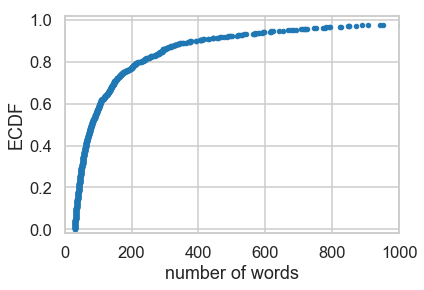

In [60]:
sum_of_words_long = bow_train.sum(axis=0)
sum_of_words = sum_of_words_long.flatten().tolist()[0]



def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    #data_sorted = np.sort(data)
    #total = data.sum()
    #y_matrix = np.cumsum(data_sorted)/total
    #y = np.squeeze(np.asarray(y_matrix))
    y = np.arange(1, n+1)/n
    return x, y


x_cdf, y_cdf = ecdf(sum_of_words)



    
# Generate plot
_ = plt.plot(x_cdf, y_cdf, marker='.', linestyle='none')

# Make the margins nice
_ = plt.margins(0.02)

# Label the axes
_ = plt.xlabel('number of words')
_ = plt.ylabel('ECDF')
_ = plt.xlim([0,1000])


plt.show()

In [61]:
# Use the df_min and df_max found from ecdf to re bag of words
bow_transformer = CountVectorizer(analyzer=text_process, min_df=30, max_df=10000, ngram_range=(2,3))

bow_train= bow_transformer.fit_transform(rt_train)

# Print total number of vocab words.fit(df_narative['Review narrative'])

print(len(bow_transformer.vocabulary_))

bow_test = bow_transformer.transform(rt_test)

931


### TF-IDF Model
Term Frequency-Inverse Document Frequence (TF-IDF) assigns continuous values instead of the simple integers for the token frequency. Words that appear frequently overall tend to not establish anything of note in a document hence a lower weight. Words that are unique are then weighted higher.

In [55]:
#transform text to TFIDF format

from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

tfidf_transformer = TfidfTransformer()


msg_train = tfidf_transformer.fit_transform(bow_train)
msg_test = tfidf_transformer.transform(bow_test)
print(msg_train.shape)

(6788, 931)


The result is the transformed review text into a vectorized bag of words that has been converted to term frequency-inverse document frequency (tfidf). TFIDF give weight to words according to how frequent they appear in documents in the corpus.

### Classifier using NLP only and Naive Bayes Model

As a quick check, we'll use the TFIDF matrix and Naive Bayes classifier to predict consumer recommendation. We'll first train-test-split and random under sample.

Then, we'll use selectKbest for the feature selection of the tfidf matrix. This function from sklearn module selects features according to the k highest scores. In choosing the best k, the code below generates a Naive Bayes score plot with different choices of k. To select the best one, we look for a peak.

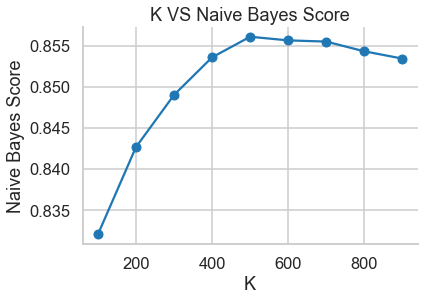

In [56]:
# feature selection using k best
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

krange = np.arange(1,10)*100


# choose k for feature selection
score_k =[]

for i in krange:
    # kbest feature selection
    skb = SelectKBest(k=i)
    msg_new = skb.fit_transform(msg_train, label_train_1)
    
    # run naive bayes 
    mnb = MultinomialNB()
    param_grid = {"alpha": [ 0.01, 0.1, 1, 5, 50]}
    grid_mnb = GridSearchCV(mnb, param_grid=param_grid, cv=5)
    grid_mnb.fit(msg_new,label_train_1)

    # record the best score from the model
    #print('Best Score:', grid_mnb.best_score_)
    score_k.append(grid_mnb.best_score_)

    
sns.set_style('whitegrid')
plt.plot(krange,score_k, 'o-')
plt.title('K VS Naive Bayes Score')
plt.xlabel('K')
plt.ylabel('Naive Bayes Score')
sns.despine()
plt.savefig('kscore.png', bbox_inches='tight', dpi = 150)

Looks like the best k is at 500

In [57]:
skb = SelectKBest(k=500)
msg_train_select = skb.fit_transform(msg_train, label_train)

print('TFIDF shape before kbest selection',msg_train.shape)
print('TFIDF shape after kbest selection',msg_train_select.shape)

msg_test_select = skb.transform(msg_test)

TFIDF shape before kbest selection (6788, 931)
TFIDF shape after kbest selection (6788, 500)


In [58]:
#start a grid search for Naive Bayes classifier
mnb = MultinomialNB()
param_grid = {"alpha": [ 0.01, 0.1, 1, 5, 50],
              
              }

grid_mnb = GridSearchCV(mnb, param_grid=param_grid, cv=5)
grid_mnb.fit(msg_train_select,label_train)

# Printing the best score from the model
print('Best Score:', grid_mnb.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_mnb.best_params_
print('Best Parameters:', best_params)

Best Score: 0.8560695344725987
Best Parameters: {'alpha': 0.01}


In [59]:
#initiate a instance for classifier
mnb = MultinomialNB(**best_params)

# Fit the classifier to the training data
mnb.fit(msg_train_select,label_train)

# Predict the labels of the test data: y_pred
y_pred = mnb.predict(msg_test_select)

scores_mnb_train = cross_val_score(mnb, msg_train_select,label_train, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_train.mean(), 
                                                                                 scores_mnb_train.std()*2))
scores_mnb_test = cross_val_score(mnb, msg_test_select, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_test.mean(), 
                                                                                 scores_mnb_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

Cross Validation Accuracy Scores - Training Set: 0.85607(+/- 0.01)
Cross Validation Accuracy Scores - Test Set: 0.84842(+/- 0.00)
Confusion matrix on the test data:
[[  589  2289]
 [  114 12848]]
Classification report on the test data:
              precision    recall  f1-score   support

           0       0.84      0.20      0.33      2878
           1       0.85      0.99      0.91     12962

   micro avg       0.85      0.85      0.85     15840
   macro avg       0.84      0.60      0.62     15840
weighted avg       0.85      0.85      0.81     15840



### Combine Features

Here we combine NLP with the rest of the data

In [63]:
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE

# combine NLP and other features

X_train = hstack([msg_train_select,feature_train_choose])
X_test = hstack([msg_test_select,feature_test_choose])

# Use random over sampler to make sure data for classifying has even classes. 

print("Size of training X before over-sampling", X_train.shape)

sm = SMOTE(random_state=41)
X_train_ros, label_train_ros = sm.fit_sample(X_train, label_train)

print("Size of training X after over-sampling", X_train_ros.shape)
np.unique(label_train_ros, return_counts=True)

Size of training X before over-sampling (6788, 513)
Size of training X after over-sampling (11130, 513)


(array([0, 1], dtype=int64), array([5565, 5565], dtype=int64))

In [64]:
from itertools import compress

# record feature names
col1 = feature_train_choose.columns.values.tolist()


col2 = bow_transformer.get_feature_names()
#np.col2.shape
#col2[skb.get_support(indices=True)]

# mask the col2 list with the k best feature selection result
col2_new = list(compress(col2, skb.get_support()))

col_names= col2_new + col1

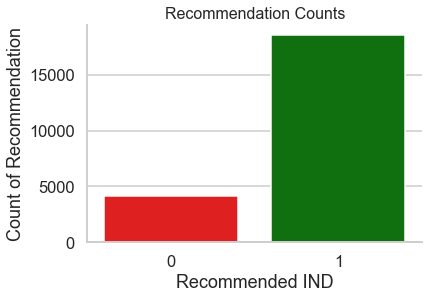

In [65]:
#check recommendation. 
sns.countplot(df['Recommended IND'], palette=['red','green'])
plt.title('Recommendation Counts',fontsize=16)
sns.set_style('whitegrid')
sns.despine()
plt.ylabel('Count of Recommendation')
plt.savefig('recommendationcount.png', bbox_inches='tight', dpi = 150)

With the data prepared, we will proceed to test with several classification models. I will find the accuracy score using naive bayes, random forest classifier and logistic regression. For each model, the cross validated grid search will be called to find the best parameters. Then these parameters are fed back into the model for prediction of the test data.

### Naive Bayes Model

In [66]:
# initiate score recorder
score_train = []
score_test = []
time_all = []

In [67]:
#start a grid search for Naive Bayes classifier
mnb = MultinomialNB()
param_grid = {"alpha": [ 0.0001, 0.001, 0.01, 1, 5, 50]}

grid_mnb = GridSearchCV(mnb, param_grid=param_grid, cv=5)
grid_mnb.fit(X_train_ros, label_train_ros)

# Printing the best score from the model
print('Best Score:', grid_mnb.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_mnb.best_params_
print('Best Parameters:', best_params)

Best Score: 0.8639712488769092
Best Parameters: {'alpha': 0.0001}


In [68]:
# import datetime
from datetime import datetime
import time

start_time = time.time()

#initiate a instance for classifier
mnb = MultinomialNB(**best_params)

# Fit the classifier to the training data
mnb.fit(X_train_ros, label_train_ros)

# Predict the labels of the test data: y_pred
y_pred = mnb.predict(X_test)

scores_mnb_train = cross_val_score(mnb, X_train_ros, label_train_ros, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_train.mean(), 
                                                                                 scores_mnb_train.std()*2))
scores_mnb_test = cross_val_score(mnb,X_test, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_mnb_test.mean(), 
                                                                                 scores_mnb_test.std()*2))

runtime = time.time() - start_time


score_train.append(scores_mnb_train.mean())
score_test.append(scores_mnb_test.mean())
time_all.append(runtime)

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

Cross Validation Accuracy Scores - Training Set: 0.86397(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.88251(+/- 0.01)
Confusion matrix on the test data:
[[ 2375   503]
 [ 1459 11503]]
Classification report on the test data:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      2878
           1       0.96      0.89      0.92     12962

   micro avg       0.88      0.88      0.88     15840
   macro avg       0.79      0.86      0.81     15840
weighted avg       0.90      0.88      0.88     15840



### Random Forest Classifier

In [69]:
#Random forest classifier parameter optimization:

rf = RandomForestClassifier()
param_grid = {"n_estimators": [50, 200, 300],
              "max_features": [20, 40],
              "max_depth": [10, 20]
              }

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_train_ros, label_train_ros)

# Printing the best score from the model
print('Best Score:', grid_rf.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_rf.best_params_
print('Best Parameters:', best_params)

Best Score: 0.959299191374663
Best Parameters: {'max_depth': 20, 'max_features': 20, 'n_estimators': 200}


In [70]:
start_time = time.time()

#initiate a instance for classifier
rf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf.fit(X_train_ros, label_train_ros)

# Predict the labels of the test data: y_pred
y_pred = rf.predict(X_test)

scores_rf_train = cross_val_score(rf, X_train_ros, label_train_ros, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_rf_train.mean(), 
                                                                                 scores_rf_train.std()*2))
scores_rf_test = cross_val_score(rf,  X_test, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

runtime = time.time() - start_time

score_train.append(scores_rf_train.mean())
score_test.append(scores_rf_test.mean())
time_all.append(runtime)

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

Cross Validation Accuracy Scores - Training Set: 0.95885(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.93775(+/- 0.00)
Confusion matrix on the test data:
[[ 2749   129]
 [  888 12074]]
Classification report on the test data:
              precision    recall  f1-score   support

           0       0.76      0.96      0.84      2878
           1       0.99      0.93      0.96     12962

   micro avg       0.94      0.94      0.94     15840
   macro avg       0.87      0.94      0.90     15840
weighted avg       0.95      0.94      0.94     15840



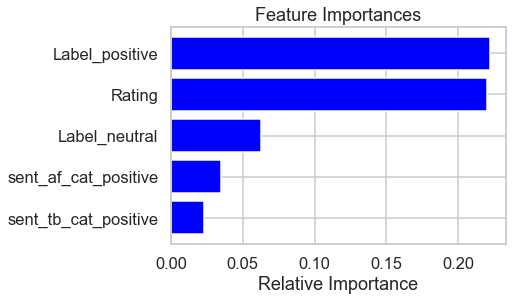

<Figure size 432x288 with 0 Axes>

In [72]:
# feature importance plot

importances = rf.feature_importances_
indices = np.argsort(importances)
importances[indices][-5:]

#plt.plot(importances[indices].tolist())

plt.title('Feature Importances')
plt.barh(range(5), importances[indices][-5:], color='b', align='center')
plt.yticks(range(5), [col_names[i] for i in indices[-5:]])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('topfeatures.png', bbox_inches='tight', dpi = 150)

### Logist Regression

In [73]:
# Logistic Regression Classifier
# Parameter optimization
clf = LogisticRegression()
parameters = [{'C':[0.1,1,10,100], 'solver':['lbfgs'], 'fit_intercept':[True]},
              {'C':[0.1,1,10,100], 'solver':['liblinear'], 'penalty':['l1', 'l2'], 'fit_intercept':[True]}]
# Instantiating and fitting model through grid search
grid_logR = GridSearchCV(clf, param_grid=parameters)
grid_logR.fit(X_train_ros, label_train_ros)

# Printing the best score from the model
print('Best Score:', grid_logR.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_logR.best_params_
print('Best Parameters:', best_params)


start_time = time.time()

#initiate a instance for classifier using the optimized parameters
clf = LogisticRegression(**best_params)

# Fit the classifier to the training data
clf.fit(X_train_ros, label_train_ros)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

scores_LR_train = cross_val_score(clf, X_train_ros, label_train_ros, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_LR_train.mean(), 
                                                                                 scores_LR_train.std()*2))
scores_LR_test = cross_val_score(clf, X_test, label_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_LR_test.mean(), 
                                                                            scores_LR_test.std()*2))
runtime = time.time() - start_time

score_train.append(scores_LR_train.mean())
score_test.append(scores_LR_test.mean())
time_all.append(runtime)

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(label_test, y_pred))
print('Classification report on the test data:')
print(classification_report(label_test, y_pred))

C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vangk\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vangk\AppDat

Best Score: 0.9600179694519317
Best Parameters: {'C': 100, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear'}
Cross Validation Accuracy Scores - Training Set: 0.95948(+/- 0.02)
Cross Validation Accuracy Scores - Test Set: 0.93870(+/- 0.01)
Confusion matrix on the test data:
[[ 2462   416]
 [  745 12217]]
Classification report on the test data:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2878
           1       0.97      0.94      0.95     12962

   micro avg       0.93      0.93      0.93     15840
   macro avg       0.87      0.90      0.88     15840
weighted avg       0.93      0.93      0.93     15840



### Compare all three models

In [74]:
models = ['Naive Bayes', 'Random Forest Classifier', 'Logistic Regression']
model_comp = pd.DataFrame(
    {'model_name': models,
     'Accuracy score on train': score_train[:3],
     'Accuracy score on test': score_test[:3],
     'Time to run': time_all[:3]
    })

print(model_comp)

                 model_name  Accuracy score on train  Accuracy score on test  \
0               Naive Bayes                 0.863971                0.882513   
1  Random Forest Classifier                 0.958850                0.937752   
2       Logistic Regression                 0.959479                0.938699   

   Time to run  
0     0.119683  
1   102.666383  
2     5.636453  


In [75]:
time_all

[0.11968302726745605, 102.66638255119324, 5.636452913284302]

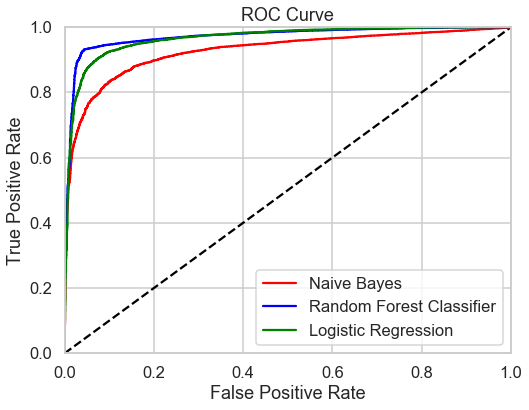

In [76]:
# prepare ROC curve plot
y_pred_prob_mnb = mnb.predict_proba(X_test)[:,1]
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
y_pred_prob_lg = clf.predict_proba(X_test)[:,1]


# Generate ROC curve values: fpr, tpr, thresholds
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(label_test, y_pred_prob_mnb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(label_test, y_pred_prob_rf)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(label_test, y_pred_prob_lg)


# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_mnb, tpr_mnb, 'red', label='Naive Bayes')
plt.plot(fpr_rf, tpr_rf, 'blue', label='Random Forest Classifier')
plt.plot(fpr_lg, tpr_lg, 'green', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
#lgd=plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title('ROC Curve')
plt.savefig('roccurve.png', bbox_inches='tight', dpi = 150)

Based on the above metrics we see that Random Forest Classifier is the best classifer for predicting whether a consumer will recommend an item or not. 

# Summary

1. Dresses, knits, and blouses are the most reviewed and recommended items. On average, they receive pretty good positive feedback as well.
2. Majority of these female consumers range from ages 30-40; however their age doesn't really show any influence in their clothing ratings.
3. Overall metrics shows that Afinn is a slightly better sentiment analyzer than Textblob.
4. Applying sentiment from Afinn and Textblob as part of the many input variables, we see that one with the most influence in the machine learning models are: Label_pos, Rating, Label_neutral, Sent_af_pos, and Sent_tb_pos.
5. Comparing the three machine learning models (Naive Bayes, Random Forest Classifier, and Logistic Regression), we see that Random Forest Classifier is the best model for predicting wheather these women will recommend an item or not.